In [2]:
import sklearn
%config Completer.use_jedi = False
#or ?titanic_df.drop for example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# We vertrekken van de titanic dataset titanic-train.csv (zie BB)
# TO DO: lees dit csv bestand in
titanic_df = pd.read_csv("titanic-train.csv")


In [4]:
# TO DO: toon de eerste 10 rijen van deze dataset

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# TO DO: hoeveel rijen en hoeveel kolommen heeft deze dataset, maw wat is de shape van deze dataset?

titanic_df.shape


(891, 12)

In [6]:
# Doel: passagiers uit de testdata classificeren als survived of niet
# Niet alle features spelen een rol in overleving 
# TO DO: delete deze features: id, naam, nr ticket en cabin
# Je kan hiervoor de drop() methode gebruiken; let erop dat je de aanpassingen doet in de dataset zelf


In [7]:
titanic_df = titanic_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [8]:
# TO DO: toon opnieuw de eerste 10 rijen van deze dataset: je mag nu nog maar 8 kolommen overhouden

titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [9]:
# TO DO: Bepaal het aantal missing values per feature

In [10]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
# ML algoritmen kunnen niet omgaan met missing values; 2 mogelijkheden (zie deel 2 data repre): imputation of delete
# Wij kiezen voor deleten
# TO DO: delete de observaties (personen) met missing values; de methode dropna() kan je hiervoor gebruiken


In [12]:
titanic_df = titanic_df.dropna()

In [13]:
# TO DO: Bepaal opnieuw de shape van deze dataset; je houdt nu 712 rijen en 8 kolommen over.


In [14]:
titanic_df.shape

(712, 8)

In [15]:
# Vraag voor de numerische variabelen hetvolgende op:
# - aantal niet null waarden
# - gemiddelde
# - standaard afwijking
# - minimum en maximum waarde
# - de 3 kwartielen


In [16]:
titanic_df.notnull().sum()

Survived    712
Pclass      712
Sex         712
Age         712
SibSp       712
Parch       712
Fare        712
Embarked    712
dtype: int64

In [17]:
titanic_df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712,712.000000,712.000000,712.000000,712.000000,712
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554
mean,0.404494,2.240169,NaN,29.642093,0.514045,0.432584,34.567251,NaN
std,0.491139,0.836854,NaN,14.492933,0.930692,0.854181,52.938648,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.645850,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.000000,NaN


In [18]:
# We zoeken die features die invloed hebben op survived
# TO DO: Is er een verband tussen survived en leeftijd?

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

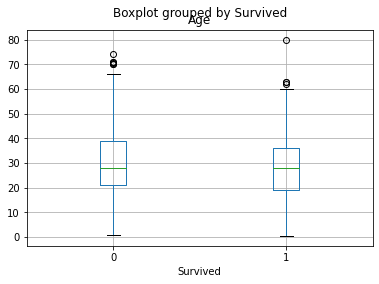

In [19]:
titanic_df[titanic_df.Survived.notnull()].boxplot('Age', 'Survived')

In [20]:
# We zoeken die features die invloed hebben op survived
# TO DO: Is een verband tussen survived en fare?

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

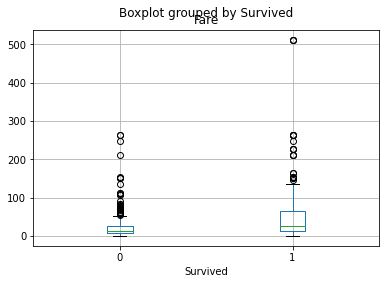

In [21]:
titanic_df[titanic_df.Survived.notnull()].boxplot('Fare', 'Survived')  #histogram

In [22]:
# We zoeken die features die invloed hebben op survived
# Speelt het geslacht een rol in surviven? 
# TO DO: Zoek het verband tussen survived en geslacht

<AxesSubplot:title={'center':'Verband tussen survived en geslacht'}, xlabel='[female, male]'>

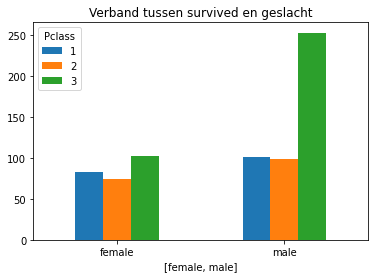

In [23]:
pd.crosstab(titanic_df.Sex, titanic_df.Pclass).plot(xlabel = ["female", "male"], kind = 'bar', rot = 0, title = 'Verband tussen survived en geslacht')

In [24]:
# We zoeken die features die invloed hebben op survived
# Speelt passengerClass een rol in surviven? 
# TO DO: Zoek het verband tussen survived en passengerclass

<AxesSubplot:title={'center':'Verband tussen survived en geslacht'}, xlabel='[female, male]'>

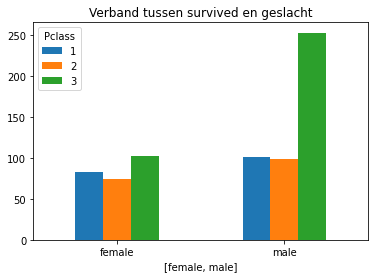

In [25]:
pd.crosstab(titanic_df.Sex, titanic_df.Pclass).plot(xlabel = ["female", "male"], kind = 'bar', rot = 0, title = 'Verband tussen survived en geslacht')

In [26]:
# Is er verband (correlatie) tussen de features onderling? 
# TO DO: bepaal de correlatie tussen de features


In [27]:
# Start ML ==> we maken de dataset klaar voor het toepassen van ML algorime
# Herinner ML algoritmen hebben numerieke waarden nodig ==> labels vervangen door getallen
# Eerte feature die we omzetten in numerieke waarden is Sex: 'female' / 'male' ==> 0 / 1
# We gebruiken de fit_transform() methode (van LabelEncoder()) om female om te zetten naar 0 en male naar 1
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])


In [28]:
# TO DO: toon de eerste 5 rijen van deze dataset en controleer dat "Sex" bestaat uit 0 en 1

In [29]:
titanic_df['Sex'].head(5)

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [30]:
# origine waarden van 'Sex' kan je terugvinden via  
label_encoder.classes_

array(['female', 'male'], dtype=object)

In [31]:
# Tweede feature die we omzetten in numerieke waarden is Embarked
# Niet geordende categorische data kan omgezet worden met oa. one hot encoding
# De categorische variabele embarked ==> 3 nieuwe discrete variabelen (met waarden 0 en 1)
titanic = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [32]:
# Shuffle de dataset
titanic = titanic.sample(frac=1).reset_index(drop=True) 
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.7958,0,0,1
1,1,2,1,3.0,1,1,18.7500,0,0,1
2,0,3,1,30.0,0,0,8.0500,0,0,1
3,1,1,1,27.0,0,0,30.5000,0,0,1
4,0,1,1,40.0,0,0,0.0000,0,0,1


In [33]:
# We schrijven de nieuwe data weg naar een csv bestand 
titanic.to_csv('titanic_train_df_klaar.csv', index = False) 
titanic_ML = pd.read_csv('titanic_train_df_klaar.csv')

In [34]:
# TO DO: Splits de dataset op in "train" en "test" (80% train en 20% test)
# TO DO: zet income in X en outcome (nl survived) in y
# Je kan hiervoor de voorgeprogrammeerde methode train_test_split() gebruiken

from sklearn.model_selection import train_test_split
X = titanic_ML.drop('Survived', axis=1)
y = titanic_ML['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(569, 9)
(569,)
(143, 9)
(143,)


In [35]:
# TO DO: vraag de shape op van X_train en y_train

In [36]:
print(X_train.shape)
print(y_train.shape)

(569, 9)
(569,)


In [37]:
# TO DO: print de eerste 5 rijen van X_train

In [38]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
205,2,1,54.0,1,0,26.0000,0,0,1
67,1,1,30.0,0,0,27.7500,1,0,0
445,2,1,18.0,0,0,13.0000,0,0,1
232,1,1,36.0,0,1,512.3292,1,0,0
380,2,0,55.0,0,0,16.0000,0,0,1


In [39]:
# TO DO: vraag de shape op van X_test en y_test
print(X_test.shape)
print(y_test.shape)

(143, 9)
(143,)


In [40]:
# Pas het logistic regression algoritme voor classificatie toe
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty= 'l2', solver='liblinear').fit(X_train, y_train)

In [41]:
# TO DO: bepaal de voorspelde waarde y_pred
y_pred = logistic_model.predict(X_test)

In [42]:
# Hoe goed is deze predictie?
# Print de echte y-waarde en de voorspelde y-waarde af van 10 personen
print(y_test)
print("-"*75)  # print a line
print(y_pred)

616    1
290    0
692    0
391    0
554    1
      ..
234    1
699    1
395    1
543    0
47     0
Name: Survived, Length: 143, dtype: int64
---------------------------------------------------------------------------
[1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0]


In [43]:
# TO DO: maak een kruistabel van y_pred tov y_test

In [44]:
titanic_crosstab = pd.crosstab(y_pred, y_test)
titanic_crosstab

Survived,0,1
row_0,,
0,69,20
1,11,43


In [45]:
# Er zijn kengetallen die de juistheid van de voorspelling weergeven
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [46]:
# TO DO: bepaal de accuracy_score tussen y_test en y_pred
# TO DO: bepaal de precision_score tussen y_test en y_pred
# TO DO: bepaal de recall_score tussen y_test en y_pred
    
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")

Accuracy =  78.32167832167832 %


In [47]:
# TO DO: bepaal de precision_score tussen y_test en y_pred

print("Accuracy = ", precision_score(y_test, y_pred) * 100, "%")

Accuracy =  79.62962962962963 %


In [48]:
# TO DO: bepaal de recall_score tussen y_test en y_pred

print("Accuracy = ", recall_score(y_test, y_pred) * 100, "%")

Accuracy =  68.25396825396825 %


In [49]:
# Ditzelfde kan je ook berekenen uit de crosstab
titanic_crosstab

Survived,0,1
row_0,,
0,69,20
1,11,43


In [50]:
TP = titanic_crosstab[1][1] #True Positve
TN = titanic_crosstab[0][0] #True Negative
FN = titanic_crosstab[1][0] 
FP = titanic_crosstab[0][1]  

In [51]:
acc_score_controle = (TP + TN) / (TP + TN + FP + FN)
prec_score_controle = TP / (TP + FP)
rec_score_controle = TP / (TP + FN)
print(acc_score_controle)
print(prec_score_controle)
print(rec_score_controle)

0.7832167832167832
0.7962962962962963
0.6825396825396826


In [52]:
#extra uitleg over functies...
from sklearn.model_selection import train_test_split
?train_test_split